In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

# Pasring The Data AND Splitting The Data

In [6]:
from shine_ai.dataset import DataSet
from shine_ai.parser import Parser
import os.path as path


import scipy.io
import pandas as pd

mat = scipy.io.loadmat('data/data_ST.mat')

data_path = path.join('.','data','data_ST.mat')
parser = Parser(file_path='./data/data_ST.mat')
experiment_labels = parser.experiment_labels

test_percentage = 50
data_sets = []

for index, exp_lbl in enumerate(parser.experiment_labels):
    print(100*'-')
    print('\n\nEXPERIMENT', exp_lbl)
    set = DataSet(name=exp_lbl, parser=parser, test_percentage=test_percentage, experiment_index=index)
    data_sets.append(set)

----------------------------------------------------------------------------------------------------


EXPERIMENT Hplasma_HNBI
REMOVING NANS

N SAMPLES AFTER NANS REMOVED = 396

RANDOMLY SPLITTING DATA INTO TEST AND TRAINING SETS: 50% test, 50% training.
----------------------------------------------------------------------------------------------------


EXPERIMENT Dplasma_HNBI
REMOVING NANS

N SAMPLES AFTER NANS REMOVED = 394

RANDOMLY SPLITTING DATA INTO TEST AND TRAINING SETS: 50% test, 50% training.
----------------------------------------------------------------------------------------------------


EXPERIMENT Dplasma_DNBI
REMOVING NANS

N SAMPLES AFTER NANS REMOVED = 464

RANDOMLY SPLITTING DATA INTO TEST AND TRAINING SETS: 50% test, 50% training.
----------------------------------------------------------------------------------------------------


EXPERIMENT DTplasma_HNBI
REMOVING NANS

N SAMPLES AFTER NANS REMOVED = 390

RANDOMLY SPLITTING DATA INTO TEST AND TRAINING SETS: 50%

# Training The AI Models

In [7]:
# import sys, os
# pathap = os.path.join('home','djdaniel','ShineThrough','GENE_ML','gene_ml')
# os.system(f"export PYTHONPATH=$PYTHONPATH:{pathap}")
# sys.path.append(pathap)
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.models.SVM import SVM
from GENE_ML.gene_ml.models.NN import NN
from GENE_ML.gene_ml.models.XGBoost import XGBoost as XGB

from shine_ai.models import Exponential

from GENE_ML.gene_ml.results.results import Results


experiment_index = 0

gpr = GPR(name='gpr')
xgb = XGB()
exp = Exponential(experiment_label=experiment_labels[experiment_index])

models_names = ['gpr', 'xgb', 'exp']
models = [gpr, xgb, exp]

print('LOOKING AT EXPERIMENT:', experiment_labels[experiment_index])
data_set = data_sets[experiment_index]

results = []
for model, model_name in zip(models, models_names):
    model.fit(data_set.x_train_norm, data_set.shine_train)
    result = Results(model_name+'.results')
    if model_name == 'gpr':
        result.predict_unseen = model.predict(data_set.x_test_norm)[0]
        result.predict_seen = model.predict(data_set.x_train_norm)[0]
    elif model_name == 'exp':
        result.predict_unseen = model.predict(data_set.x_test)
        result.predict_seen = model.predict(data_set.x_train)
    else:
        result.predict_unseen = model.predict(data_set.x_test_norm)
        result.predict_seen = model.predict(data_set.x_train_norm)
    
    results.append(result)

LOOKING AT EXPERIMENT: Hplasma_HNBI
GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 185.75348454330734
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (4,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -715.4124553256081
Optimization restart 2/3, f = -716.0018872515227
Optimization restart 3/3, f = -716.0018783336209
RESULTING HYPERS:
 
Name : GP regression
Objective : -716.0018872515227
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  p

gpr
NO UNCERTAINTY PROVIDED
xgb
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_16465/1399461136.py:23: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


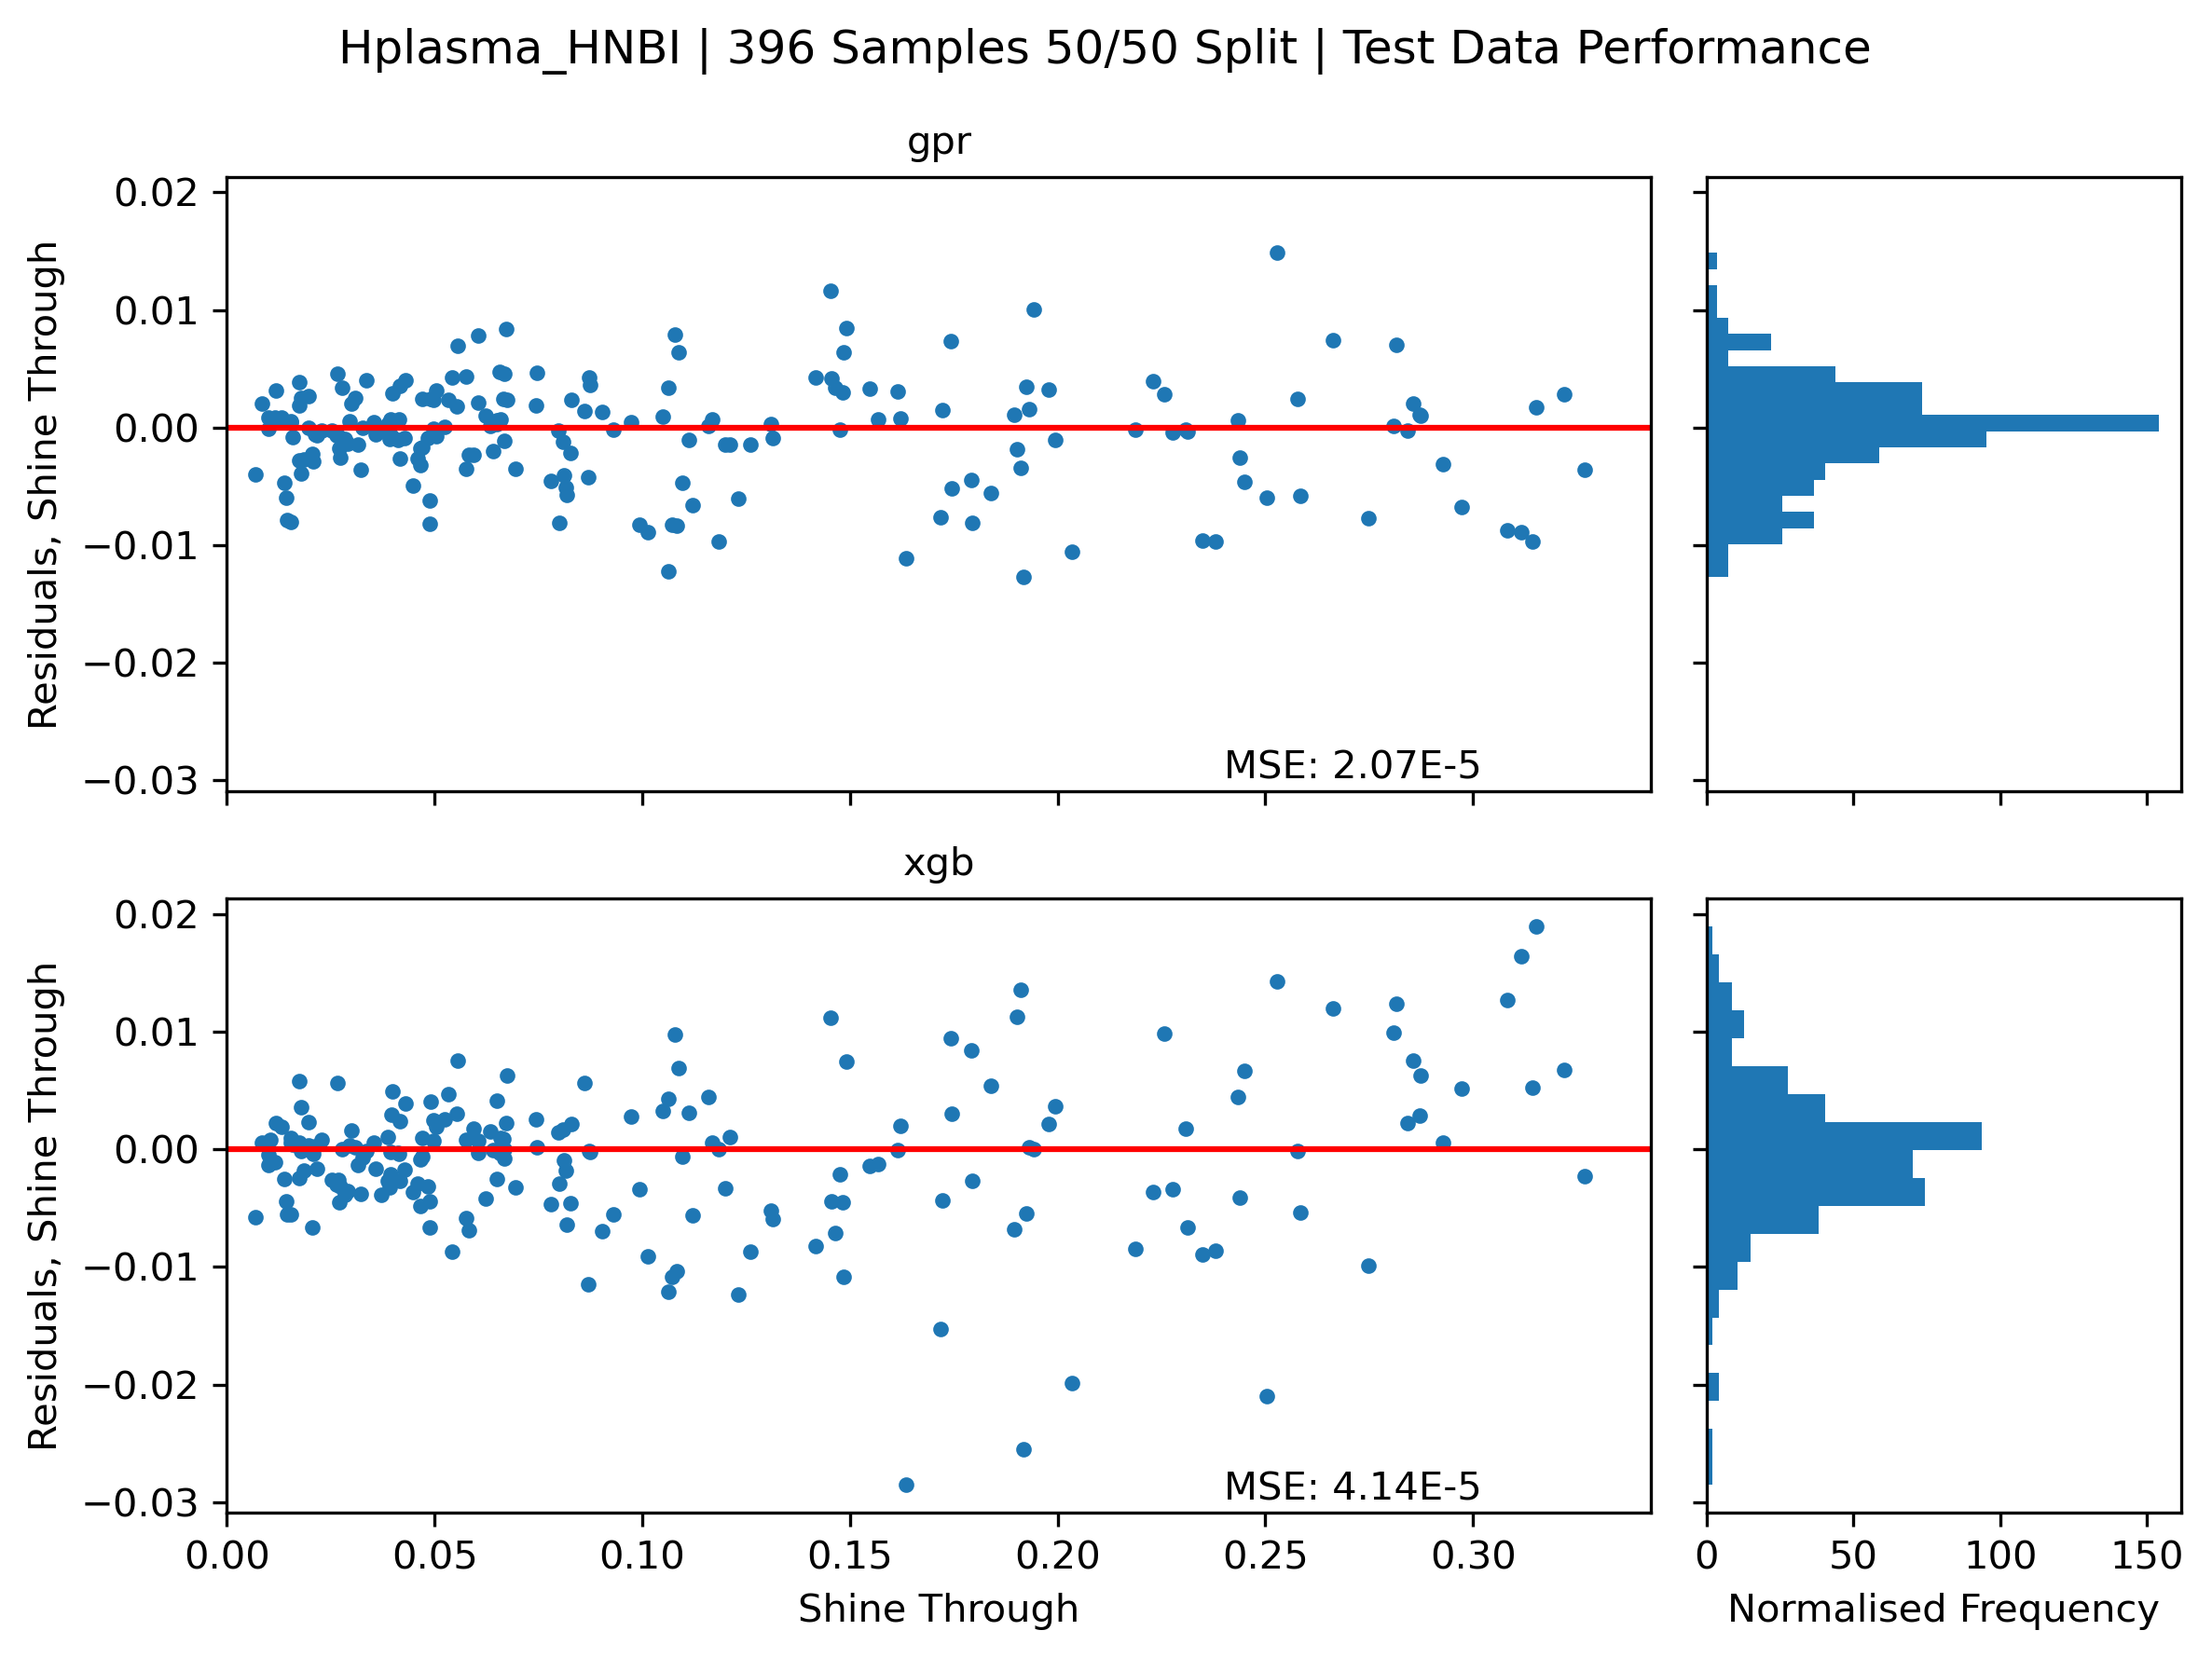

In [8]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
ncol=2
nrow=len(results)-1
width=2*2
height=1.5*2
fig_residuals, AX = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=300, sharex='col', sharey=True, gridspec_kw={'width_ratios': [3, 1]})

fs=10
for model, Ax, model_name, result in zip(models, AX, models_names, results):
    print(model_name)
    vis.residual_plot(Ax[0], fig_residuals, data_set.shine_test, result.predict_unseen, var_name='Shine Through', title=f'{model_name}', font_size=fs)
    if model_name=='exp':print('res',result.predict_unseen)
    vis.residual_hist(Ax[1], fig_residuals, data_set.shine_test, result.predict_unseen, var_name='Shine Through', bins=20)
    if model_name=='exp': break


axBL, axBR = AX[-1]
axBL.set_xlabel('Shine Through')
axBR.set_xlabel('Normalised Frequency')
fig_residuals.suptitle(f'{experiment_labels[data_set.experiment_index]} | {data_set.n_samples} Samples 50/50 Split | Test Data Performance')
fig_residuals.tight_layout()
fig_residuals.show()

gpr
NO UNCERTAINTY PROVIDED
xgb
NO UNCERTAINTY PROVIDED
exp
NO UNCERTAINTY PROVIDED
res [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

 /tmp/ipykernel_16465/4112971291.py:23: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


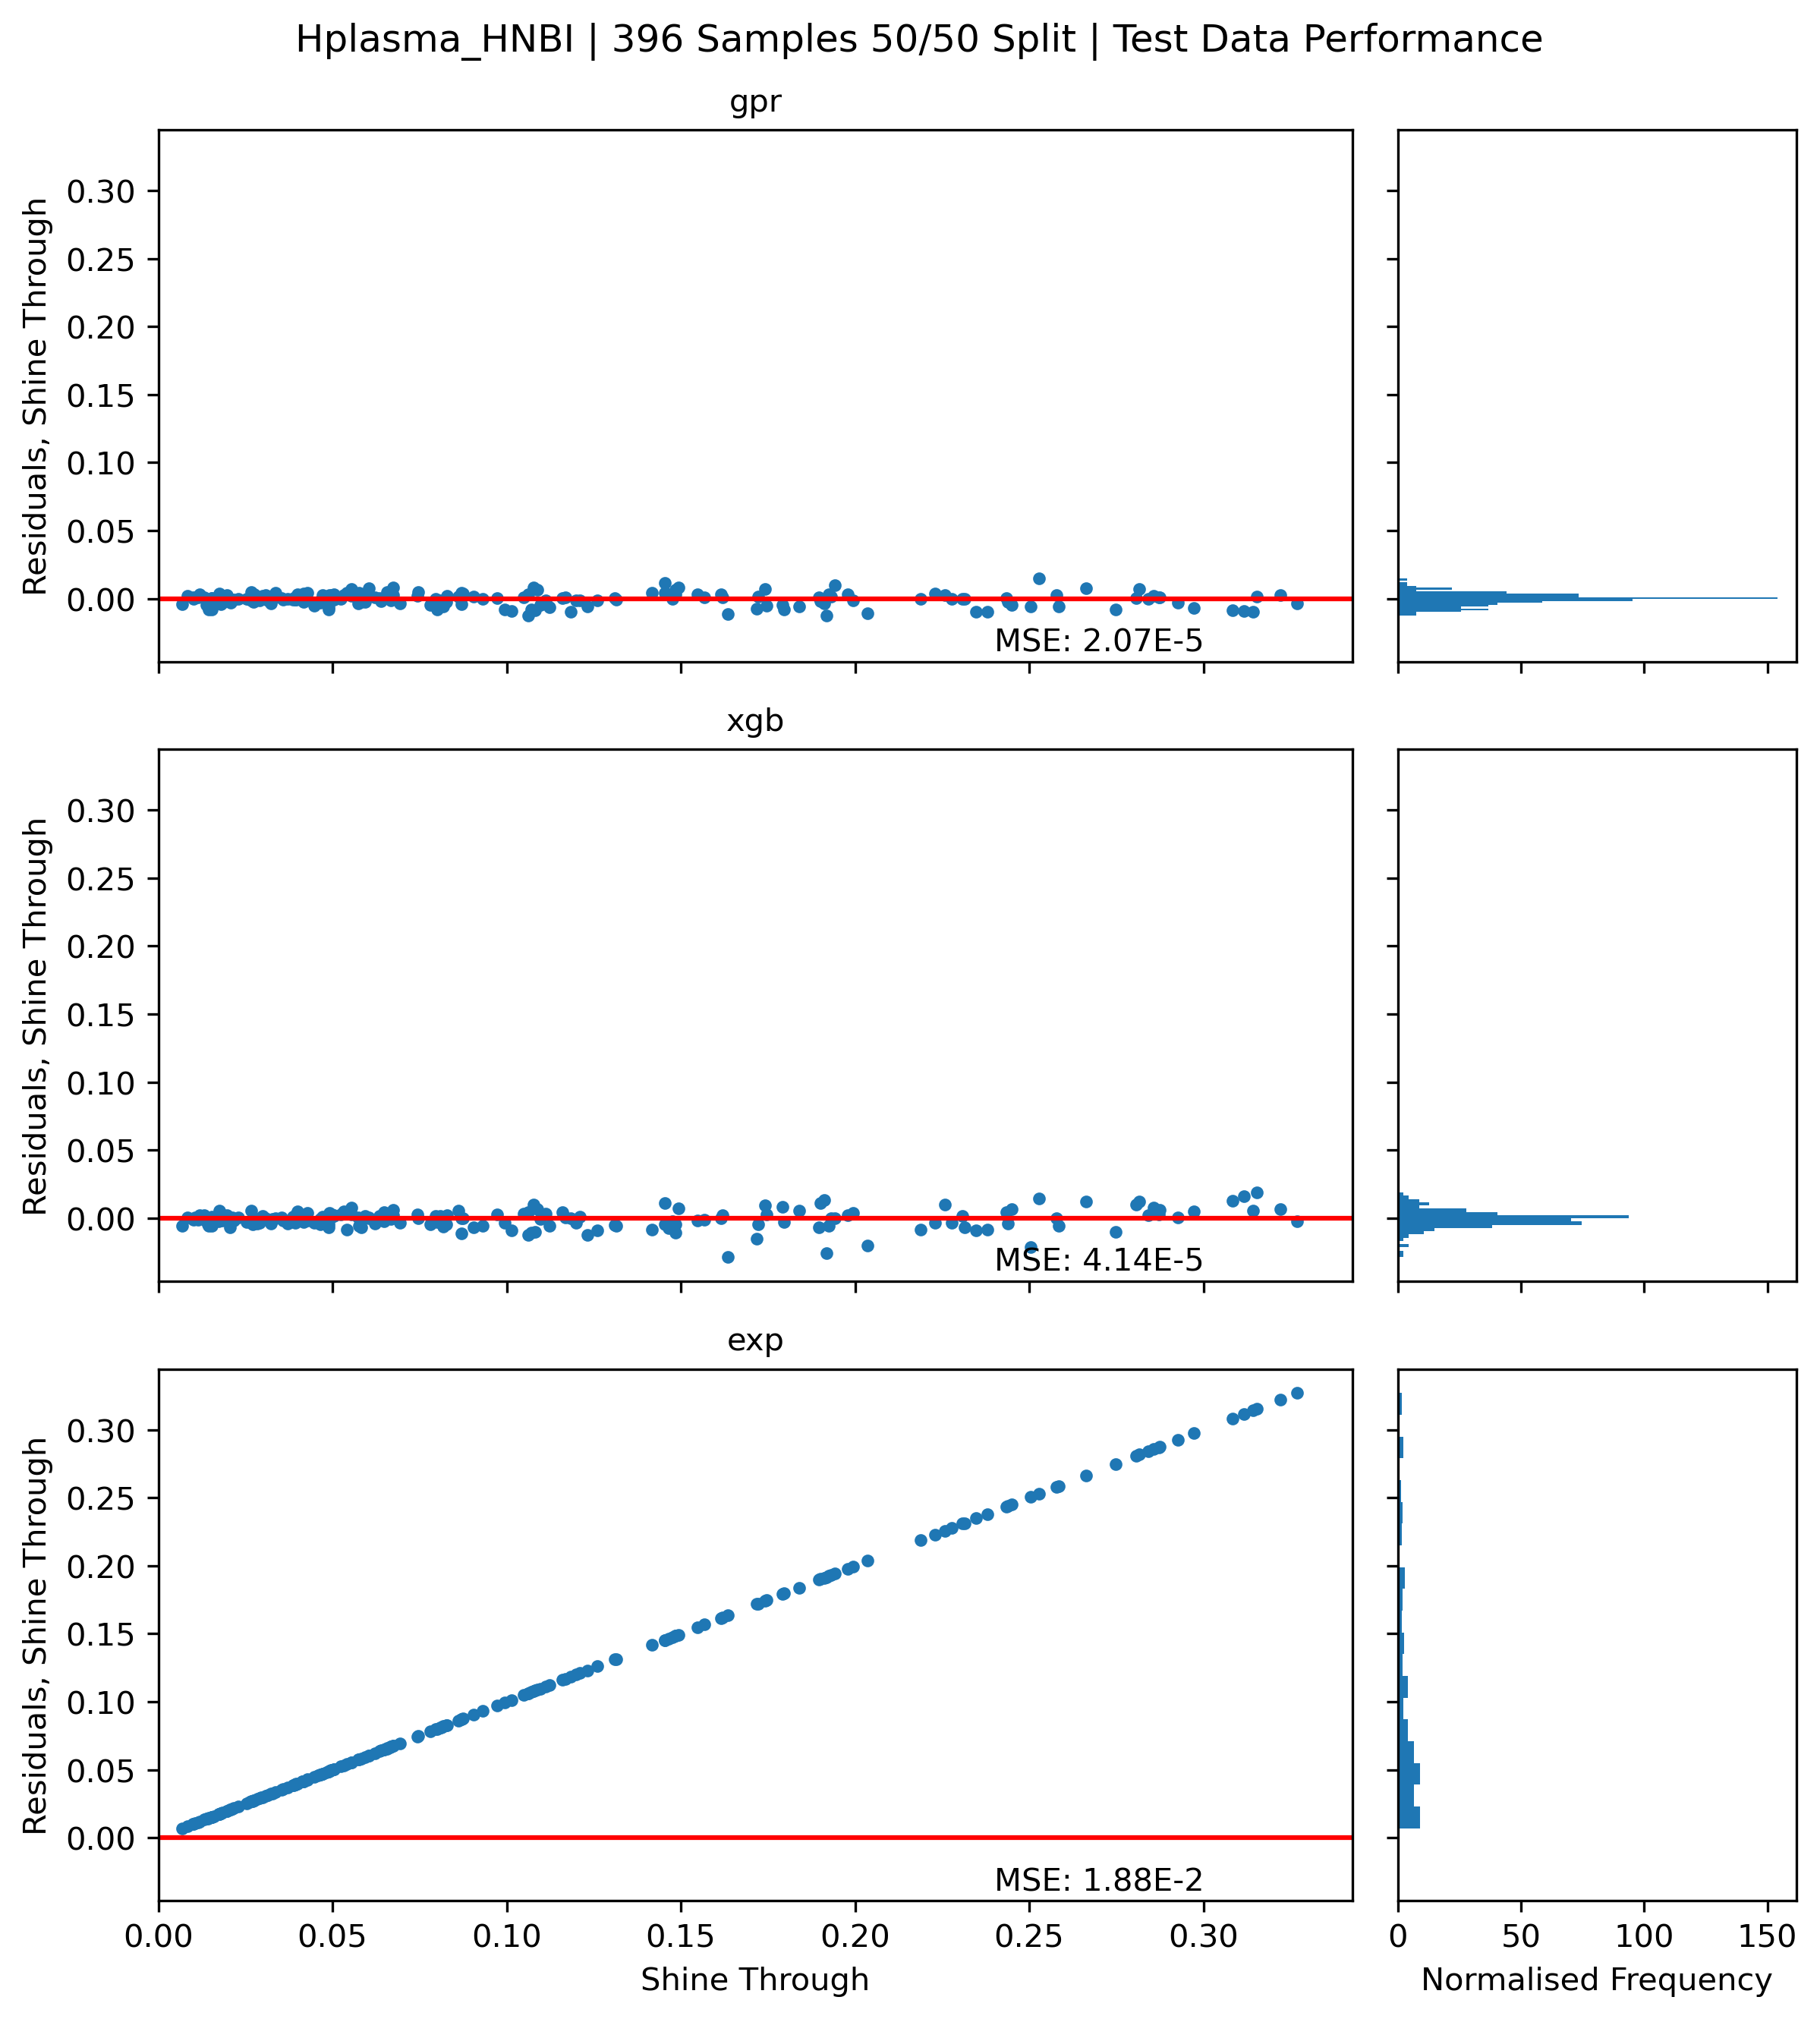

In [5]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
ncol=2
nrow=len(results)
width=2*2
height=1.5*2
fig_residuals, AX = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=300, sharex='col', sharey=True, gridspec_kw={'width_ratios': [3, 1]})

fs=10
for model, Ax, model_name, result in zip(models, AX, models_names, results):
    print(model_name)
    vis.residual_plot(Ax[0], fig_residuals, data_set.shine_test, result.predict_unseen, var_name='Shine Through', title=f'{model_name}', font_size=fs)
    if model_name=='exp':print('res',result.predict_unseen)
    vis.residual_hist(Ax[1], fig_residuals, data_set.shine_test, result.predict_unseen, var_name='Shine Through', bins=20)



axBL, axBR = AX[-1]
axBL.set_xlabel('Shine Through')
axBR.set_xlabel('Normalised Frequency')
fig_residuals.suptitle(f'{experiment_labels[data_set.experiment_index]} | {data_set.n_samples} Samples 50/50 Split | Test Data Performance')
fig_residuals.tight_layout()
fig_residuals.show()